In [1]:
#
import pandas
from statsmodels.tsa.seasonal import MSTL
from matplotlib import pyplot

#
# data = pandas.read_csv('./result.csv')
data = pandas.read_csv('./result_model_medieval.csv')
data = data.set_index('jx')
# GDP GS3 A091RC1Q027SBEA TLT IVV
"""
y = data['IVV'].values
mstl = MSTL(y, periods=[3, 6, 12, 36])  # 3 = quarter, 6 = semiyear, 12 = year, 36 = 3 years
res = mstl.fit()
resulted = pandas.DataFrame(data={'date': data.index.values,
                                  'origin': y,
                                  'seasonal_3': res.seasonal[:, 0],
                                  'seasonal_6': res.seasonal[:, 1],
                                  'seasonal_12': res.seasonal[:, 2],
                                  'seasonal_36': res.seasonal[:, 3],
                                  'trend': res.trend,
                                  'residual': res.resid, })

ax = resulted.plot(x='date', y=['origin', 'trend', 'residual'])
resulted.plot(x='date', y=['seasonal_3', 'seasonal_6', 'seasonal_12', 'seasonal_36'], secondary_y=True, ax=ax)
"""

# https://www.statsmodels.org/dev/examples/notebooks/generated/tsa_filters.html#Christiano-Fitzgerald-approximate-band-pass-filter:-Inflation-and-Unemployment


# ['GS3', 'T10YIEM', 'USACPIALLMINMEI', 'KCFSI', 'MICH']    TLT_MEAN__pct
# ['TOTALSA', 'GDP', 'USACPIALLMINMEI', 'EMRATIO', 'KCFSI']
#
from functional import SomersD


def target_defined(y):
    if y < -0.015:
        return -1
    elif y < 0.015:
        return 0
    else:
        return 1


def score_defined(y):
    if y < -0.015:
        return -1
    elif y < 0.015:
        return 0
    else:
        return 1


data['target'] = data['IVV_MEAN__pct'].apply(func=target_defined)


In [2]:
target = 'IVV_MEAN__pct'
'''
x_factors = ['IVV__rolling_12__None__<function ewm_1shock_relative_6 at 0x000001E037385900>',
 'SPASTT01CNM657N__rolling_12__None__<function n_rate_conseq at 0x000001E037386290>',
 'IVV__rolling_6__None__<function ewm_1shock_relative_6 at 0x000001E037385900>',
 'IIPPORTAQ__rolling_6__None__<function mean_relative at 0x000001E0373855A0>',
 'SPASTT01KRM657N__rolling_12__None__<function linear_slope at 0x000001E037386170>',
 'IIPPORTAQ__rolling_6__None__<function ewm_1shock_relative_12 at 0x000001E037385990>',
 'SPASTT01USM657N__full_binners_20_perc',
 'BAMLC0A0CMEY__rolling_3__None__<function linreg_relative at 0x000001E037385750>',
 'BAMLC0A0CMEY__rolling_6__None__<function linear_r2err at 0x000001E037386200>',
 'TLT_MEAN__full_seasonal_remove_mstl_get_seasonal_resid__rolling_6__None__<function relative_mean at 0x000001E0373865F0>',
 'IIPPORTAQ__rolling_6__None__<function ewm_1shock_relative_6 at 0x000001E037385900>',
 'JTU5300QUL__full_seasonal_remove_mstl_get_seasonal_resid__rolling_3__None__<function median_relative at 0x000001E037385630>',
 'IIPPORTAQ__rolling_6__None__<function median_relative at 0x000001E037385630>',
 'PCU483111483111__full_seasonal_remove_mstl_get_seasonal_resid__rolling_6__None__<function median_relative at 0x000001E037385630>',
 'BAMLC0A0CMEY__rolling_6__None__<function n_rate_conseq at 0x000001E037386290>',
 'IVV__rolling_12__None__<function n_rate_conseq at 0x000001E037386290>',
 'IVV_MEAN__pct__full_binners_20_perc',
 'BAMLH0A0HYM2EY__rolling_3__None__<function linreg_relative at 0x000001E037385750>',
 'IVV__rolling_6__None__<function n_rate_conseq at 0x000001E037386290>',
 'IVV__rolling_3__None__<function mean_relative at 0x000001E0373855A0>',
 'IVV__rolling_12__None__<function ewm_1shock_relative_3 at 0x000001E037385870>',
 'IVV__rolling_3__None__<function median_relative at 0x000001E037385630>',
 'IVV__rolling_6__None__<function ewm_1shock_relative_3 at 0x000001E037385870>',
 'SPASTT01USM657N',
 'IVV__rolling_3__None__<function ewm_1shock_relative_12 at 0x000001E037385990>',
 'IVV__rolling_3__None__<function ewm_1shock_relative_6 at 0x000001E037385900>',
 'IVV__pct__full_binners_20_perc',
 'IVV__rolling_3__None__<function ewm_1shock_relative_3 at 0x000001E037385870>',
 'IVV__rolling_3__None__<function linreg_relative at 0x000001E037385750>',
 'IVV__pct',
 'RECPROUSM156N__rolling_12__None__<function relative_positive_pct at 0x000001E037386680>',
 'GS1M__full_seasonal_remove_mstl_get_seasonal_resid__rolling_6__None__<function linear_r2err at 0x000001E037386200>',
 'GS3__full_seasonal_remove_mstl_get_seasonal_resid__rolling_12__None__<function ewm_1shock_relative_12 at 0x000001E037385990>',
 'GDP__full_seasonal_remove_mstl_get_seasonal_resid__rolling_3__None__<function rel_to_max at 0x000001E0373863B0>',
 'DGDSRX1__rolling_12__None__<function ewm_1shock_relative_12 at 0x000001E037385990>',
 'DCAFRC1A027NBEA__rolling_6__None__<function linreg_relative at 0x000001E037385750>',
 'PMSAVE__full_seasonal_remove_mstl_get_seasonal_resid__rolling_6__None__<function ewm_1shock_relative_12 at 0x000001E037385990>',
 'CPF3M__rolling_3__None__<function relative_positive_pct at 0x000001E037386680>',
 'CPF1M__rolling_12__None__<function linreg_relative at 0x000001E037385750>']
x_factors_p1 = x_factors[:30]
x_factors_p2 = x_factors[30:]
x_factors_p1.reverse()
x_factors = x_factors_p1 + x_factors_p2
'''
# '''
x_factors = pandas.read_csv('./listed_ivv_v6.csv').iloc[-100:, 0].values.tolist()
x_factors.reverse()
# '''
# x_factors = ['IVV__pct', 'IVV_MEAN__pct']
time_axis = data.index
time_sub_rate = 0.50
time_sub_replace = False
nt = int(time_axis.shape[0] * time_sub_rate)
n = 100
r2_trains_z_up, r2_tests_z_up = [], []
r2_trains_z_mean, r2_tests_z_mean = [], []
r2_trains_z_down, r2_tests_z_down = [], []
kt_trains_z_up, kt_tests_z_up = [], []
kt_trains_z_mean, kt_tests_z_mean = [], []
kt_trains_z_down, kt_tests_z_down = [], []
per_p_kst = []
for i in range(len(x_factors) - 1):
    current_base = x_factors[:i+1]
    r2_trains, r2_tests = [], []
    kt_trains, kt_tests = [], []
    kt_trains_bin, kt_tests_bin = [], []
    for j in range(n):
        import numpy
        # ix_time = numpy.random.choice(time_axis.values, size=(nt,), replace=time_sub_replace)
        ixes = numpy.random.choice(list(range(time_axis.shape[0] - 1)), size=(nt,), replace=time_sub_replace)
        x_ix_train = time_axis.values[:-1][ixes]
        y_ix_train = time_axis.values[1:][ixes]
        left_ixes = [x for x in list(range(time_axis.shape[0] - 1)) if x not in ixes]
        x_ix_test = time_axis.values[:-1][left_ixes]
        y_ix_test = time_axis.values[1:][left_ixes]
    
        x_train = data.loc[x_ix_train, current_base].values
        y_train = data.loc[y_ix_train, target].values
        x_test = data.loc[x_ix_test, current_base].values
        y_test = data.loc[y_ix_test, target].values
        biny_train = data.loc[y_ix_train, 'target'].values
        biny_test = data.loc[y_ix_test, 'target'].values
    
        from sklearn.model_selection import train_test_split
        xxx_train, xxx_test, yyy_train, yyy_test = x_train, x_test, y_train, y_test
        from sklearn.preprocessing import StandardScaler
        sk = StandardScaler()
        xxx_train_st = sk.fit_transform(X=xxx_train)
        xxx_test_st = sk.transform(X=xxx_test)
        from sklearn.linear_model import LinearRegression
        m = LinearRegression()
        m.fit(X=xxx_train_st, y=yyy_train)
        y_hat_train = m.predict(X=xxx_train_st)
        y_hat_test = m.predict(X=xxx_test_st)
        from sklearn.metrics import r2_score
        r2_train = r2_score(y_true=yyy_train, y_pred=y_hat_train)
        r2_test = r2_score(y_true=yyy_test, y_pred=y_hat_test)
        from scipy.stats import kendalltau
        kt_train = kendalltau(x=yyy_train, y=y_hat_train).statistic
        kt_test = kendalltau(x=yyy_test, y=y_hat_test).statistic
        y_hat_train_bin = pandas.Series(y_hat_train).apply(func=score_defined).values
        y_hat_test_bin = pandas.Series(y_hat_test).apply(func=score_defined).values
        kt_train_bin = kendalltau(x=biny_train, y=y_hat_train_bin).statistic
        kt_test_bin = kendalltau(x=biny_test, y=y_hat_test_bin).statistic
        from matplotlib import pyplot
        # fig, ax = pyplot.subplots(1, 2)
        # pandas.DataFrame(data={'error': yyy_train - y_hat_train}).hist(bins=20, ax=ax[0])
        # pandas.DataFrame(data={'error': yyy_test - y_hat_test}).hist(bins=20, ax=ax[1])
        r2_trains.append(r2_train)
        r2_tests.append(r2_test)
        kt_trains.append(kt_train)
        kt_tests.append(kt_test)
    r2_train_up = numpy.array(r2_trains).max()
    r2_train_mean = numpy.array(r2_trains).mean()
    r2_train_down = numpy.array(r2_trains).min()
    r2_test_up = numpy.array(r2_tests).max()
    r2_test_mean = numpy.array(r2_tests).mean()
    r2_test_down = numpy.array(r2_tests).min()
    kt_train_up = numpy.array(kt_trains).max()
    kt_train_mean = numpy.array(kt_trains).mean()
    kt_train_down = numpy.array(kt_trains).min()
    kt_test_up = numpy.array(kt_tests).max()
    kt_test_mean = numpy.array(kt_tests).mean()
    kt_test_down = numpy.array(kt_tests).min()
    r2_trains_z_up.append(r2_train_up)
    r2_trains_z_mean.append(r2_train_mean)
    r2_trains_z_down.append(r2_train_down)
    r2_tests_z_up.append(r2_test_up)
    r2_tests_z_mean.append(r2_test_mean)
    r2_tests_z_down.append(r2_test_down)
    kt_trains_z_up.append(kt_train_up)
    kt_trains_z_mean.append(kt_train_mean)
    kt_trains_z_down.append(kt_train_down)
    kt_tests_z_up.append(kt_test_up)
    kt_tests_z_mean.append(kt_test_mean)
    kt_tests_z_down.append(kt_test_down)
    print(i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98


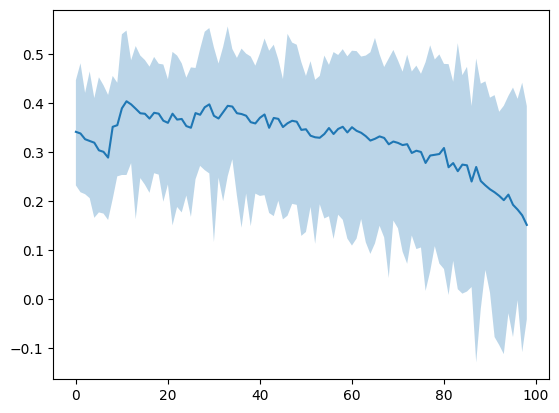

In [3]:
pyplot.plot(list(range(len(x_factors)-1)), kt_tests_z_mean)
pyplot.fill_between(list(range(len(x_factors)-1)), kt_tests_z_down, kt_tests_z_up, alpha=.3)

In [45]:
from scipy import stats
max_mean = max(kt_tests_z_mean)
max_mean_ix = kt_tests_z_mean.index(max_mean)
s = numpy.std(kt_tests_z_mean, ddof=1)
alpha = 0.05
max_mean_lower_ci = max_mean + stats.t.ppf(q=(alpha / 2), df=(n - 1)) * s / (n ** 0.5)
taken_ix = numpy.where(kt_tests_z_mean >= max_mean_lower_ci)[0][0]
max_mean, max_mean_ix, n, alpha, s, max_mean_lower_ci, taken_ix

(0.403671287128713,
 11,
 100,
 0.05,
 0.05642002194546485,
 0.39247633073384464,
 11)

In [46]:
current_base = x_factors[:taken_ix+1]
r2_trains, r2_tests = [], []
kt_trains, kt_tests = [], []
kt_trains_bin, kt_tests_bin = [], []
for j in range(n):
    import numpy
    # ix_time = numpy.random.choice(time_axis.values, size=(nt,), replace=time_sub_replace)
    ixes = numpy.random.choice(list(range(time_axis.shape[0] - 1)), size=(nt,), replace=time_sub_replace)
    x_ix_train = time_axis.values[:-1][ixes]
    y_ix_train = time_axis.values[1:][ixes]
    left_ixes = [x for x in list(range(time_axis.shape[0] - 1)) if x not in ixes]
    x_ix_test = time_axis.values[:-1][left_ixes]
    y_ix_test = time_axis.values[1:][left_ixes]

    x_train = data.loc[x_ix_train, current_base].values
    y_train = data.loc[y_ix_train, target].values
    x_test = data.loc[x_ix_test, current_base].values
    y_test = data.loc[y_ix_test, target].values
    biny_train = data.loc[y_ix_train, 'target'].values
    biny_test = data.loc[y_ix_test, 'target'].values

    from sklearn.model_selection import train_test_split
    xxx_train, xxx_test, yyy_train, yyy_test = x_train, x_test, y_train, y_test
    from sklearn.preprocessing import StandardScaler
    sk = StandardScaler()
    xxx_train_st = sk.fit_transform(X=xxx_train)
    xxx_test_st = sk.transform(X=xxx_test)
    from sklearn.linear_model import LinearRegression
    m = LinearRegression()
    m.fit(X=xxx_train_st, y=yyy_train)
    y_hat_train = m.predict(X=xxx_train_st)
    y_hat_test = m.predict(X=xxx_test_st)
    from sklearn.metrics import r2_score
    r2_train = r2_score(y_true=yyy_train, y_pred=y_hat_train)
    r2_test = r2_score(y_true=yyy_test, y_pred=y_hat_test)
    from scipy.stats import kendalltau
    kt_train = kendalltau(x=yyy_train, y=y_hat_train).statistic
    kt_test = kendalltau(x=yyy_test, y=y_hat_test).statistic
    y_hat_train_bin = pandas.Series(y_hat_train).apply(func=score_defined).values
    y_hat_test_bin = pandas.Series(y_hat_test).apply(func=score_defined).values
    kt_train_bin = kendalltau(x=biny_train, y=y_hat_train_bin).statistic
    kt_test_bin = kendalltau(x=biny_test, y=y_hat_test_bin).statistic
    from matplotlib import pyplot
    # fig, ax = pyplot.subplots(1, 2)
    # pandas.DataFrame(data={'error': yyy_train - y_hat_train}).hist(bins=20, ax=ax[0])
    # pandas.DataFrame(data={'error': yyy_test - y_hat_test}).hist(bins=20, ax=ax[1])
    r2_trains.append(r2_train)
    r2_tests.append(r2_test)
    kt_trains.append(kt_train)
    kt_tests.append(kt_test)

<Axes: >

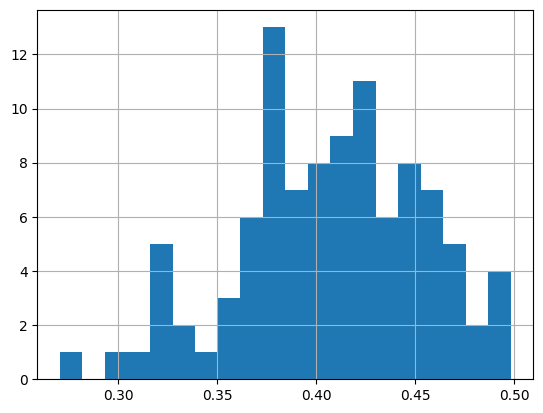

In [47]:
pandas.Series(kt_tests).hist(bins=20)

<Axes: >

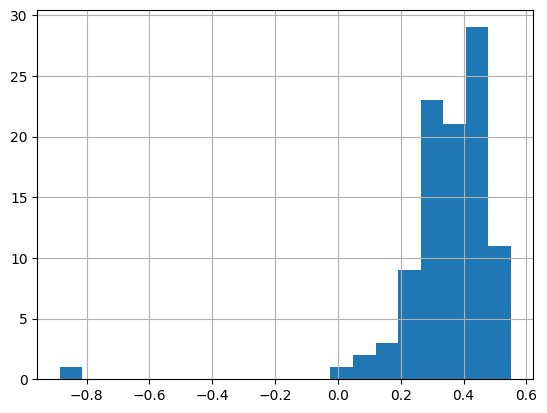

In [48]:
pandas.Series(r2_tests).hist(bins=20)